In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
metadata_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/March_29_Data/metadata.csv'
# Read the metadata file
metadata = pd.read_csv(metadata_file, index_col=0)

In [7]:
metadata.head()
metadata['Pretrain'].value_counts()

Pretrain
Train    11860
Test      2542
Val       2542
Name: count, dtype: int64

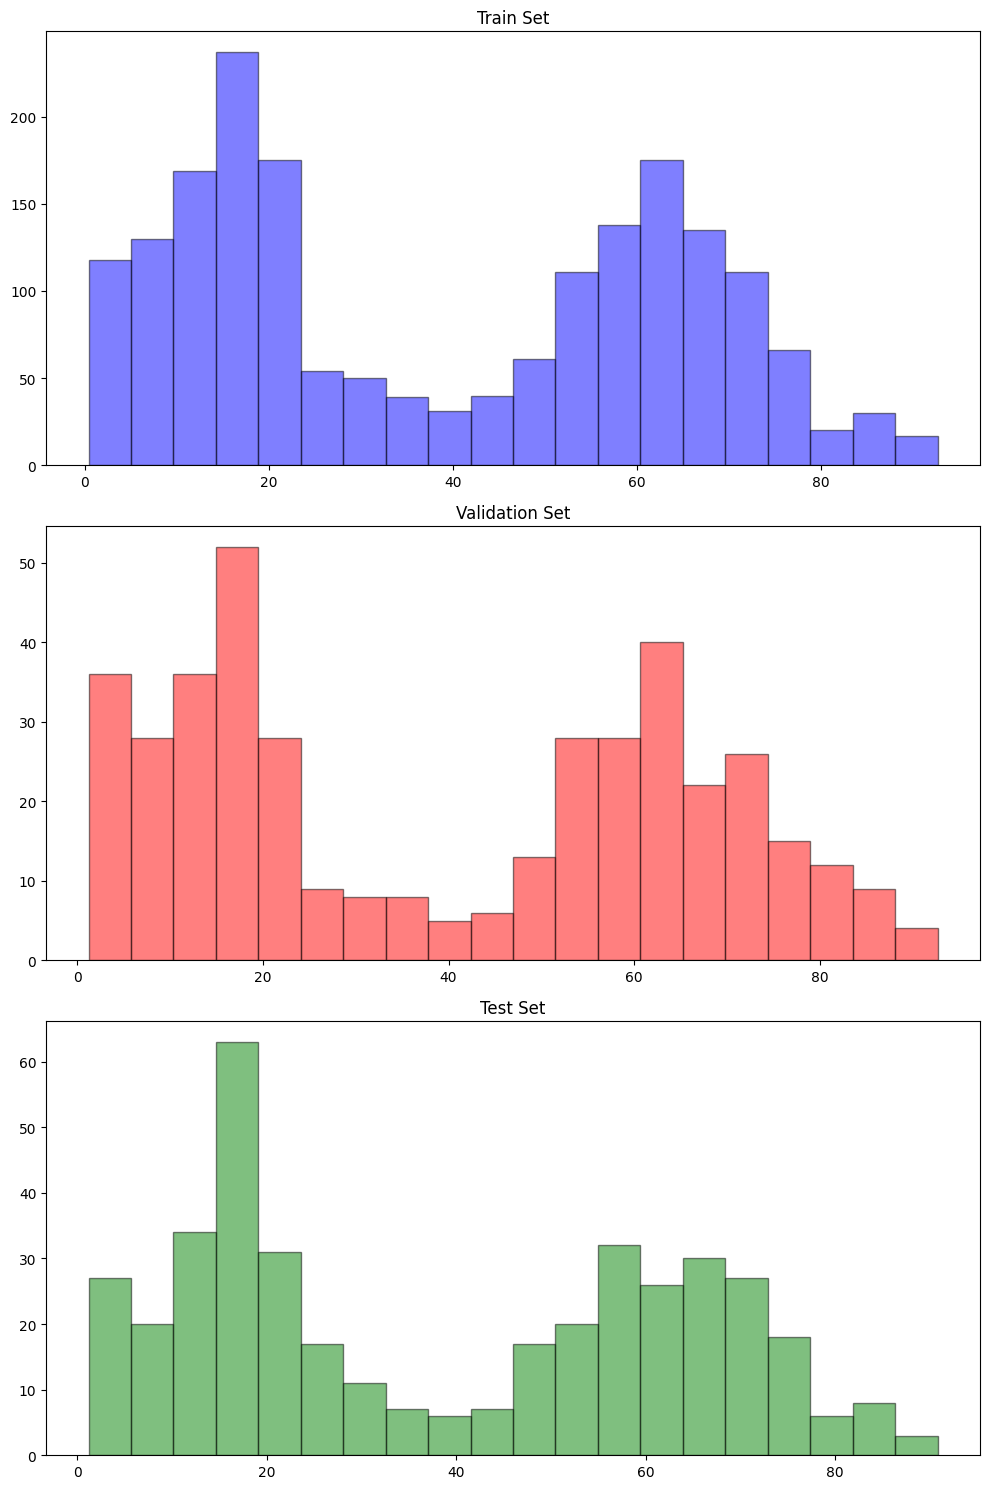

In [8]:


# Split the data into train, validation, and test sets
train = metadata[metadata['Pretrain'] == 'Train']
val = metadata[metadata['Pretrain'] == 'Val']
test = metadata[metadata['Pretrain'] == 'Test']

# Create a figure with three subplots
fig, axs = plt.subplots(3, figsize=(10, 15))

# Plot histograms of the 'Age' column for each set
axs[0].hist(train['Age'], bins=20, alpha=0.5, color='blue', edgecolor='black')
axs[0].set_title('Train Set')

axs[1].hist(val['Age'], bins=20, alpha=0.5, color='red', edgecolor='black')
axs[1].set_title('Validation Set')

axs[2].hist(test['Age'], bins=20, alpha=0.5, color='green', edgecolor='black')
axs[2].set_title('Test Set')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
from scipy.stats import ks_2samp

# Compare each pair of distributions
pairs = [('train', 'val'), ('train', 'test'), ('val', 'test')]
for pair in pairs:
    dist1 = globals()[pair[0]]['Age'].dropna()
    dist2 = globals()[pair[1]]['Age'].dropna()
    statistic, pvalue = ks_2samp(dist1, dist2)
    print(f"Kolmogorov-Smirnov test between {pair[0]} and {pair[1]}:")
    print(f"Statistic: {statistic}")
    print(f"P-value: {pvalue}")
    print()


Kolmogorov-Smirnov test between train and val:
Statistic: 0.03979984535120386
P-value: 0.6380218493371964

Kolmogorov-Smirnov test between train and test:
Statistic: 0.0366198984485912
P-value: 0.7393921396931681

Kolmogorov-Smirnov test between val and test:
Statistic: 0.0547510777771216
P-value: 0.5411456528156161



### Notes
- the p-values for each of these distributions is much larger than 0.05, so we can conclude that these distributions are statistically similar